# Problem Statement: Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records




FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.



In [332]:
#data processing
import pandas as pd
import numpy as np
import re

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# machine learning algorithms
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [277]:
train=pd.read_excel('Final_Train.xlsx')

In [278]:
test=pd.read_excel('Final_Test.xlsx')

In [279]:
#checking the first 5 rows of train set
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [280]:
#checking the first 5 rows of test set
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [281]:
#checking size of both datasets
train.shape  ,  test.shape

((5961, 7), (1987, 6))

In [282]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Train dataset contains 5961 observations for doctor consultation fees with 6 parameters and target variable fees.

It contains certain null values in Rating, Place and Miscellaneous info.

In [283]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


Test dataset contains 1987 observations for doctor consultation fees with 6 parameters.

We observe certain null values in Rating, Place and Miscellaneous info in this dataset as well.

In [284]:
# ascertain column types

Col_type = train.dtypes.reset_index()
Col_type.columns = ["Number", "Data Type"]
Col_type.groupby("Data Type").aggregate('count').reset_index()

,Data Type,Number
0,int64,1
1,object,6


We have target Fees in integer format and Features in object datatype. Let us check the number of unique values in them.

In [285]:
train['Qualification'].nunique()

1420

In [286]:
train['Experience'].nunique()

64

In [287]:
train['Rating'].nunique()

51

In [288]:
train['Place'].nunique()

877

In [289]:
train['Profile'].nunique()

6

In [290]:
train['Miscellaneous_Info'].nunique()

2998

# Data Pre-Processing

Let us convert each of the object features into meaningful,usable formats

In [291]:
#Experience into integer values

train['Experience'] = train['Experience'].str.slice(stop=2).astype(int)
test['Experience'] = test['Experience'].str.slice(stop=2).astype(int)


In [292]:
#Place: fill missing values first with None values before split

train['Place'].fillna('None,None',inplace=True)
test['Place'].fillna('None,None',inplace=True)


In [293]:
#Place: create two columns for City and Area  

train['City'] = train['Place'].str.split(',').str[1]
train['Local Area'] = train['Place'].str.split(',').str[0]

test['City'] = test['Place'].str.split(',').str[1]
test['Local Area'] = test['Place'].str.split(',').str[0]


In [294]:
#checking for null values post split

train['Local Area'].isnull().sum(),test['Local Area'].isnull().sum(),train['City'].isnull().sum(),test['City'].isnull().sum()

(0, 0, 1, 0)

In [295]:
train[train['City'].isnull()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Local Area
3980,BDS,23,NaN,e,Dentist,NaN,250,NaN,e


Since Place has only 1 character in it, let us input None in both City and Local Area.

In [296]:

train.loc[train['City'].isnull(),'Local Area']='None'
train['City']=train['City'].fillna('None')


In [297]:
#Now let us drop Place

train.drop('Place',1, inplace=True)
test.drop('Place',1, inplace=True)


In [298]:
#Ratings: fill missing values

train['Rating'].fillna('0%',inplace=True)
test['Rating'].fillna('0%',inplace=True)


In [299]:
#Ratings: convert to integers

train['Rating'] = train['Rating'].str.slice(stop=-1).astype(int)
test['Rating'] = test['Rating'].str.slice(stop=-1).astype(int)

In [300]:
#Miscellaneous Info: fill null values

train['Miscellaneous_Info'].fillna('missing', inplace=True)
test['Miscellaneous_Info'].fillna('missing', inplace=True)

In [301]:
#Miscellaneous Info: extract feedback information, place details can be excluded here

def extract_feedback(info):
    res = re.search(r' (.*?) Feedback',info)
    if res:
        return int(res.group(1))
    else:
        return 0

In [302]:

train['Feedback'] = train.Miscellaneous_Info.apply(lambda x: extract_feedback(x) if '%' in str(x) else 0)
test['Feedback'] = test.Miscellaneous_Info.apply(lambda x: extract_feedback(x) if '%' in str(x) else 0)


In [303]:
#Qualifications:

train_no = train.Qualification.apply(lambda x: len(x.split(',')))
test_no = test.Qualification.apply(lambda x: len(x.split(',')))


In [304]:
#Qualifications: separate multiple Qualifications into different columns


def quali_col(data, col, col_num):
    return data[col].str.split(',').str[col_num]

for i in range(0,train_no.max()):
    qual = "Qual_"+ str(i+1)
    train[qual] = quali_col(train,'Qualification', i)
    
for i in range(0,test_no.max()):
    qual = "Qual_"+ str(i+1)
    test[qual] = quali_col(test,'Qualification', i)

In [305]:
train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,Local Area,Feedback,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,16,BHMS,MD - Homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,76,BAMS,MD - Ayurveda Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,missing,300,Bangalore,Mathikere - BEL,0,MBBS,MS - Otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"BSc - Zoology, BAMS",12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,0,BSc - Zoology,BAMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,4,BAMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [306]:
test.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,City,Local Area,Feedback,Qual_1,Qual_2,...,Qual_8,Qual_9,Qual_10,Qual_11,Qual_12,Qual_13,Qual_14,Qual_15,Qual_16,Qual_17
0,MBBS,35,0,General Medicine,missing,Mumbai,Ghatkopar East,0,MBBS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,ENT Specialist,missing,Hyderabad,West Marredpally,0,MBBS,Diploma in Otorhinolaryngology (DLO),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"MBBS, DDVL",40,70,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai,KK Nagar,4,MBBS,DDVL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAMS,0,0,Ayurveda,missing,Delhi,New Ashok Nagar,0,BAMS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore,Kanakpura Road,0,BDS,MDS - Conservative Dentistry & Endodontics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
#Encoding the categorical train data using Label Encoder

columns = ['Profile','City','Local Area']

for i in columns:
    LE=LabelEncoder()
    train[i] = LE.fit_transform(train[i])
    

In [308]:
train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,Local Area,Feedback,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10
0,"BHMS, MD - Homeopathy",24,100,5,"100% 16 Feedback Kakkanad, Ernakulam",100,4,296,16,BHMS,MD - Homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"BAMS, MD - Ayurveda Medicine",12,98,0,"98% 76 Feedback Whitefield, Bangalore",350,0,856,76,BAMS,MD - Ayurveda Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"MBBS, MS - Otorhinolaryngology",9,0,3,missing,300,0,452,0,MBBS,MS - Otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"BSc - Zoology, BAMS",12,0,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,68,0,BSc - Zoology,BAMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAMS,20,100,0,"100% 4 Feedback Keelkattalai, Chennai",250,1,335,4,BAMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
#Encoding the categorical test data using Label Encoder

columns = ['Profile','City','Local Area']

for i in columns:
    LE=LabelEncoder()
    test[i] = LE.fit_transform(test[i])
    

In [310]:
test.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,City,Local Area,Feedback,Qual_1,Qual_2,...,Qual_8,Qual_9,Qual_10,Qual_11,Qual_12,Qual_13,Qual_14,Qual_15,Qual_16,Qual_17
0,MBBS,35,0,4,missing,6,142,0,MBBS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,3,missing,5,578,0,MBBS,Diploma in Otorhinolaryngology (DLO),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"MBBS, DDVL",40,70,2,"70% 4 Feedback KK Nagar, Chennai",1,212,4,MBBS,DDVL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAMS,0,0,0,missing,3,373,0,BAMS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,1,General Dentistry Conservative Dentistry Cosme...,0,231,0,BDS,MDS - Conservative Dentistry & Endodontics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

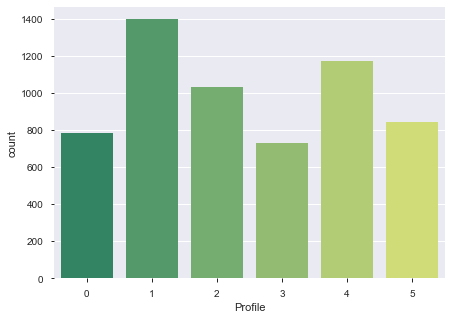

In [311]:
#Univariate Analysis for Profile
plt.figure(figsize=(7,5))
sns.countplot('Profile',data=train,palette='summer')

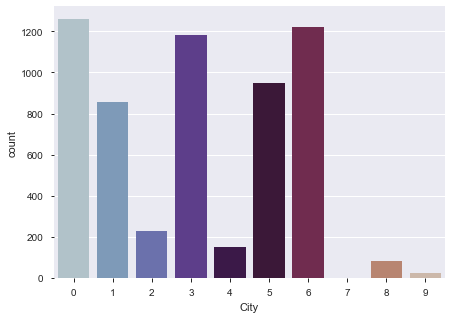

In [312]:
#univariate analysis for City data distribution
plt.figure(figsize=(7,5))
sns.countplot('City',data=train,palette='twilight')

Text(0, 0.5, 'Fees')

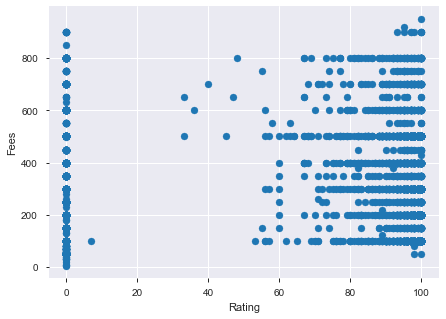

In [313]:
#bivariate analysis between ratings and Fees
plt.figure(figsize=(7,5))
plt.scatter(x=train['Rating'],y=train['Fees'])
plt.xlabel('Rating')
plt.ylabel('Fees')

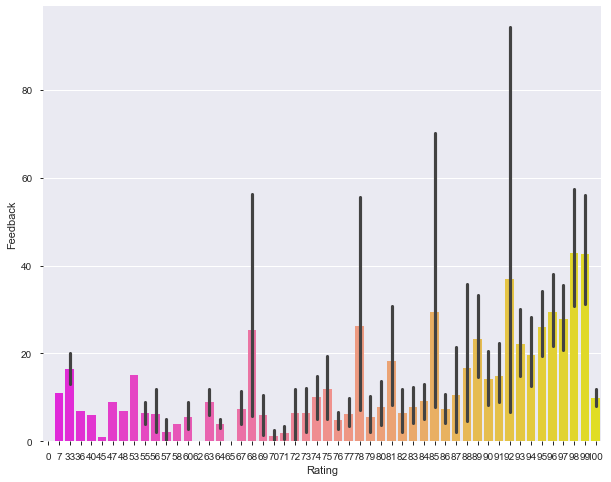

In [314]:
#bivariate analysis between 
plt.figure(figsize=(10,8))
sns.barplot(x="Rating",y="Feedback", data=train, palette= 'spring') 

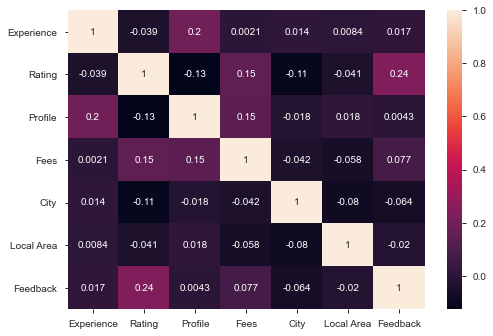

In [315]:
#examine the relationship of each numeric feature using multivariate analysis
sns.heatmap(train.corr(),annot=True)

There is low positive relationship between Fees with Ratings, Profile and Feedback variables. But the relation with other variables is even weaker. 

In [316]:
train.shape , test.shape

((5961, 19), (1987, 25))

In [317]:
#dropping Qualification & Miscellaneous info columns as it has been feature engineered earlier
train = train.drop(['Qualification', 'Miscellaneous_Info'], axis=1)
test = test.drop(['Qualification', 'Miscellaneous_Info'], axis=1)

In [318]:
train.columns

Index(['Experience', 'Rating', 'Profile', 'Fees', 'City', 'Local Area',
       'Feedback', 'Qual_1', 'Qual_2', 'Qual_3', 'Qual_4', 'Qual_5', 'Qual_6',
       'Qual_7', 'Qual_8', 'Qual_9', 'Qual_10'],
      dtype='object')

In [319]:
test.columns

Index(['Experience', 'Rating', 'Profile', 'City', 'Local Area', 'Feedback',
       'Qual_1', 'Qual_2', 'Qual_3', 'Qual_4', 'Qual_5', 'Qual_6', 'Qual_7',
       'Qual_8', 'Qual_9', 'Qual_10', 'Qual_11', 'Qual_12', 'Qual_13',
       'Qual_14', 'Qual_15', 'Qual_16', 'Qual_17'],
      dtype='object')

In [320]:
test.head()

,Experience,Rating,Profile,City,Local Area,Feedback,Qual_1,Qual_2,Qual_3,Qual_4,...,Qual_8,Qual_9,Qual_10,Qual_11,Qual_12,Qual_13,Qual_14,Qual_15,Qual_16,Qual_17
0,35,0,4,6,142,0,MBBS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31,0,3,5,578,0,MBBS,Diploma in Otorhinolaryngology (DLO),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40,70,2,1,212,4,MBBS,DDVL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,3,373,0,BAMS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16,100,1,0,231,0,BDS,MDS - Conservative Dentistry & Endodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [321]:
#Let's encode the Qualification columns


column_test = ['Qual_1', 'Qual_2', 'Qual_3', 'Qual_4',
           'Qual_5', 'Qual_6', 'Qual_7', 'Qual_8', 'Qual_9', 'Qual_10', 'Qual_11',
           'Qual_12', 'Qual_13', 'Qual_14', 'Qual_15', 'Qual_16', 'Qual_17']

column_train = ['Qual_1', 'Qual_2', 'Qual_3', 'Qual_4',
           'Qual_5', 'Qual_6', 'Qual_7', 'Qual_8', 'Qual_9', 'Qual_10']


for i in column_train:
    train[i] = train[i].apply(lambda x: 1 if not pd.isnull(x) else 0) 
    

for i in column_test:
    test[i] = test[i].apply(lambda x: 1 if not pd.isnull(x) else 0)     

In [322]:
train.head()

,Experience,Rating,Profile,Fees,City,Local Area,Feedback,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10
0,24,100,5,100,4,296,16,1,1,0,0,0,0,0,0,0,0
1,12,98,0,350,0,856,76,1,1,0,0,0,0,0,0,0,0
2,9,0,3,300,0,452,0,1,1,0,0,0,0,0,0,0,0
3,12,0,0,250,0,68,0,1,1,0,0,0,0,0,0,0,0
4,20,100,0,250,1,335,4,1,0,0,0,0,0,0,0,0,0


In [323]:
test.head()

,Experience,Rating,Profile,City,Local Area,Feedback,Qual_1,Qual_2,Qual_3,Qual_4,...,Qual_8,Qual_9,Qual_10,Qual_11,Qual_12,Qual_13,Qual_14,Qual_15,Qual_16,Qual_17
0,35,0,4,6,142,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31,0,3,5,578,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40,70,2,1,212,4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,3,373,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,100,1,0,231,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [324]:
x = train.drop('Fees', axis = 1)
y = train['Fees']

# Optimal Random State

In [341]:
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25, random_state=i)
    RF= RandomForestRegressor()
    RF.fit(x_train,y_train)
    pred_train=RF.predict(x_train)
    pred_test = RF.predict(x_test)
    print(f"With random state {i}, the training accuracy is: {r2_score(y_train, pred_train)}")
    print(f"With random state {i}, the testing accuracy is: {r2_score(y_test, pred_test)}")
    print("\n")

With random state 1, the training accuracy is: 0.8839721199852464
With random state 1, the testing accuracy is: 0.1409908549490061


With random state 2, the training accuracy is: 0.8843247378711124
With random state 2, the testing accuracy is: 0.16752668387448544


With random state 3, the training accuracy is: 0.8813685214817972
With random state 3, the testing accuracy is: 0.1885934593874471


With random state 4, the training accuracy is: 0.8824948672695858
With random state 4, the testing accuracy is: 0.1852389301206957


With random state 5, the training accuracy is: 0.8808952257139072
With random state 5, the testing accuracy is: 0.19555016639453893


With random state 6, the training accuracy is: 0.8825663401243969
With random state 6, the testing accuracy is: 0.19571714418097141


With random state 7, the training accuracy is: 0.8855918632650284
With random state 7, the testing accuracy is: 0.11582321849699684


With random state 8, the training accuracy is: 0.8802006285544728

With random state 62, the training accuracy is: 0.8851022360213372
With random state 62, the testing accuracy is: 0.11569955863525827


With random state 63, the training accuracy is: 0.8797692269758065
With random state 63, the testing accuracy is: 0.2093156753839921


With random state 64, the training accuracy is: 0.8832436134804962
With random state 64, the testing accuracy is: 0.15865478526407384


With random state 65, the training accuracy is: 0.8825196661695163
With random state 65, the testing accuracy is: 0.152630476528137


With random state 66, the training accuracy is: 0.8837478173247417
With random state 66, the testing accuracy is: 0.16721241384324637


With random state 67, the training accuracy is: 0.8865581722796914
With random state 67, the testing accuracy is: 0.14665647112467683


With random state 68, the training accuracy is: 0.8826042730485423
With random state 68, the testing accuracy is: 0.20889437505059616


With random state 69, the training accuracy is: 0.8

In [342]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=84)

# Testing Models

In [345]:
model_grid = {"Linear": LinearRegression(),
              "Ridge": Ridge(),
              "Lasso": Lasso(),
              "ElasticNet": ElasticNet(),
              "KNN": KNeighborsRegressor(),
              "DTR": DecisionTreeRegressor(),
              "RF": RandomForestRegressor(random_state=84),
              "XGB": xgb.XGBRegressor(),
              "GBM": GradientBoostingRegressor()}

scores_dict = {}
for name, model in model_grid.items():
    model.fit(x_train, y_train)
    rmse = np.mean(np.sqrt(-cross_val_score(model, x_test, y_test, cv=10, scoring="neg_mean_squared_error")))
    scores_dict[name] = rmse

scores_dict = {k: v for k, v in sorted(scores_dict.items(), key=lambda item: item[1])}
scores_dict

{'GBM': 169.26272155368866,
 'RF': 173.52137589098714,
 'Lasso': 178.2278464639666,
 'Ridge': 179.07484336947545,
 'Linear': 179.4089589267001,
 'ElasticNet': 180.4981198105918,
 'XGB': 185.52473386883145,
 'KNN': 196.26363982785384,
 'DTR': 233.53091006336552}


# Hyper Parameter Tuning

In [346]:
# GB Regressor


gb_model = GradientBoostingRegressor()


gb_params = {"n_estimators":[5,50,250],
    "learning_rate":[0.01,0.1,0.2] }


gb_cv_model = GridSearchCV(gb_model, gb_params, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)


gb_tuned = GradientBoostingRegressor(**gb_cv_model.best_params_).fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   22.6s finished


In [347]:
# Random Forests Regression


rf_model = RandomForestRegressor(random_state=6106)


rf_params = {"max_depth": [5, 8, None],
             "n_estimators": [200, 500],
             "min_samples_split": [2, 5, 10]}


rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)


rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.2min finished


In [349]:
# Lasso Regression


lasso_model = Lasso()


lasso_param = {"alpha": 10 ** (np.linspace(10, -2, 100) * 0.5)}


lasso_cv_model = GridSearchCV(lasso_model, lasso_param, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)


lasso_tuned = Lasso(**lasso_cv_model.best_params_).fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.4s finished


In [348]:
# Ridge Regression


ridge_model = Ridge()


ridge_param = {"alpha": 10 ** (np.linspace(10, -2, 100) * 0.5)}


ridge_cv_model = GridSearchCV(ridge_model, ridge_param, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)


ridge_tuned = ElasticNet(**ridge_cv_model.best_params_).fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.3s finished


In [351]:
from sklearn.metrics import mean_squared_error
from itertools import islice

# set tuned models
tuned_grid = dict([("RF", rf_tuned), ("Lasso", lasso_tuned), ("GradientBoost", gb_tuned), ("Ridge", ridge_tuned)])

# get rmse values from tuned models
tuned_scores = {}
for name, model in tuned_grid.items():
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    tuned_scores[name] = rmse

# sorting rmse
tuned_scores = {k: v for k, v in sorted(tuned_scores.items(), key=lambda item: item[1])}

# choose best model
best_model = dict(islice(tuned_scores.items(), 1))
best_model

{'RF': 166.6375443529773}

In [352]:
import pickle
filename= 'doctorfees.pkl'
pickle.dump(rf_tuned, open(filename, 'wb'))

Using fit model on the Test dataset

In [353]:
fitted_model=pickle.load(open("doctorfees.pkl","rb"))

In [354]:
fitted_model

RandomForestRegressor(max_depth=8, min_samples_split=10, n_estimators=200)

Predicted Output Array

In [356]:
predictions=fitted_model.predict(test.iloc[:,0:16])

In [357]:
predictions

array([259.66798935, 396.57758351, 341.01905386, ..., 355.35253199,
       218.35063842, 387.86396367])